In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from time import time
import matplotlib.pyplot as plt

import DynamicTimeAllocationModel

path = 'output/'

# c++ settings
do_compile = True
threads = 1

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

TO DO (precomputation):
1. Fix imprecision issues at the bottom of the Ctot grid
2. Thorough test that it works
3. Numerical inverse?


Have done:
1. New model setup in py-file
2. Precomputation of intratemporal allocation for singles
3. Precompute marginal utility for singles
4. Precomputation of intratemporal allocation for couples
5. Precomputation of marginal utility for couples 

# Solve and simulate from alternative models

Benchmark model settings

In [2]:
settings = { 
       'T':20,
       'num_A': 10,
       'num_K': 10,
       'num_power': 11,
       'num_love': 15,

       'num_Ctot': 30,

       'phi_w': 1.0,
       'phi_m': 1.0,

       'threads':threads,
       'do_egm': True,
       }

Solve application model

In [3]:
model = DynamicTimeAllocationModel.HouseholdModelClass(par=settings)
model.link_to_cpp(force_compile=do_compile)
%time model.solve()

par = model.par
sol = model.sol

CPU times: total: 2.06 s
Wall time: 2.05 s


## Precomputation: Singles

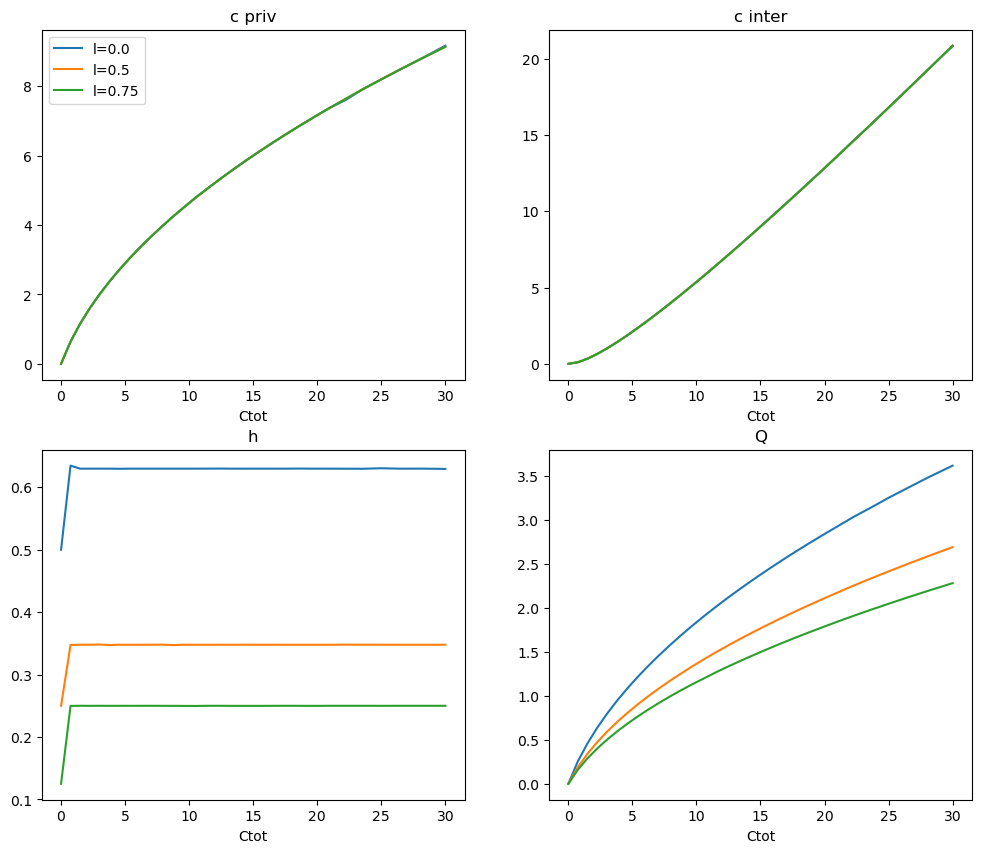

In [4]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

for i,l in enumerate(model.par.grid_l):
    ax[0,0].plot(model.par.grid_Ctot, model.sol.pre_Cw_priv_single[i,:], label=f'l={l}')
    ax[0,0].set_title('c priv')
    ax[0,0].set_xlabel('Ctot')
    ax[0,0].legend()

    ax[0,1].plot(model.par.grid_Ctot, model.sol.pre_Cw_inter_single[i,:], label=f'l={l}')
    ax[0,1].set_title('c inter')
    ax[0,1].set_xlabel('Ctot')

    ax[1,0].plot(model.par.grid_Ctot[:], model.sol.pre_hw_single[i,:], label=f'l={l}')
    ax[1,0].set_title('h')
    ax[1,0].set_xlabel('Ctot')

    ax[1,1].plot(model.par.grid_Ctot, model.sol.pre_Qw_single[i,:], label=f'l={l}')
    ax[1,1].set_title('Q')
    ax[1,1].set_xlabel('Ctot')



AMO: h is constant in Ctot due to the Cobb Douglas production function giving cross elasticities of zero. with a more general production function, h depends on Ctot (I've checked this). This is also why marginal utility does not depend on labor supply, see below. 

Text(0.5, 1.0, 'Marginal utility, singles')

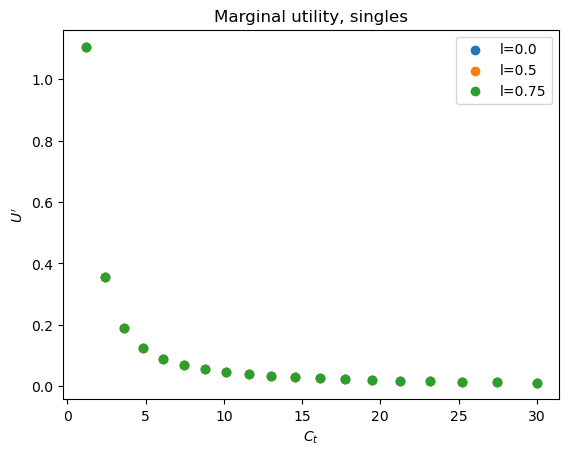

In [5]:
for il in range(par.num_l):
    plt.scatter(par.grid_C_for_marg_u[1:], par.grid_marg_u_single_m[il, 1:], label=f'l={par.grid_l[il]}')
plt.legend()
plt.xlabel('$C_t$')
plt.ylabel('$U\'$')
plt.title("Marginal utility, singles")

## Precomputation: Couples

In [6]:
model.cpp.delink()
model.link_to_cpp(force_compile=do_compile, do_print=False)
model.solve()

par = model.par
sol = model.sol

In [7]:
def plot_variable(varname, container, iPs, x_axis):
    fig, ax = plt.subplots(3,3, figsize=(15,15))
    variable = getattr(container, varname)

    for ilw,lw in enumerate(model.par.grid_l):
        for ilm, lm in enumerate(model.par.grid_l):
            for iP in iPs:
                ax[ilw, ilm].plot(x_axis, variable[ilw, ilm, :, iP], label=f'p={par.grid_power[iP] :5.2f}')
                ax[ilw, ilm].scatter(x_axis, variable[ilw, ilm, :, iP], s=10)


            ax[ilw, ilm].set_title(f'lw={lw}, lm={lm}')
            ax[ilw, ilm].set_xlabel('Ctot')
            ax[ilw, ilm].legend()


iPs = [1, 5, 9]

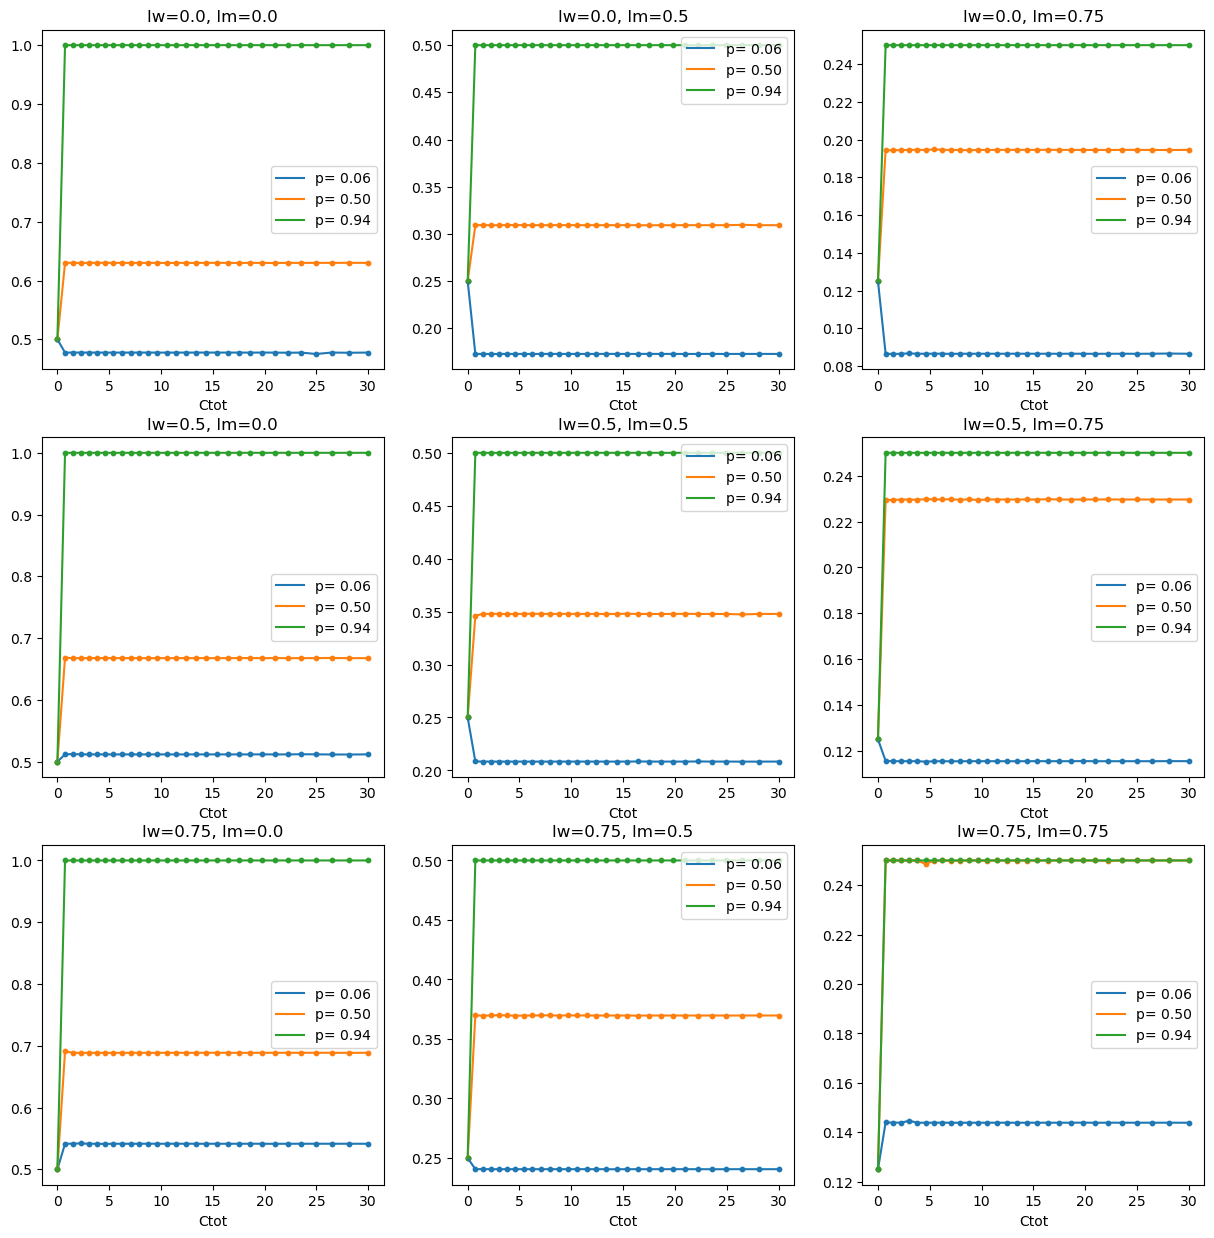

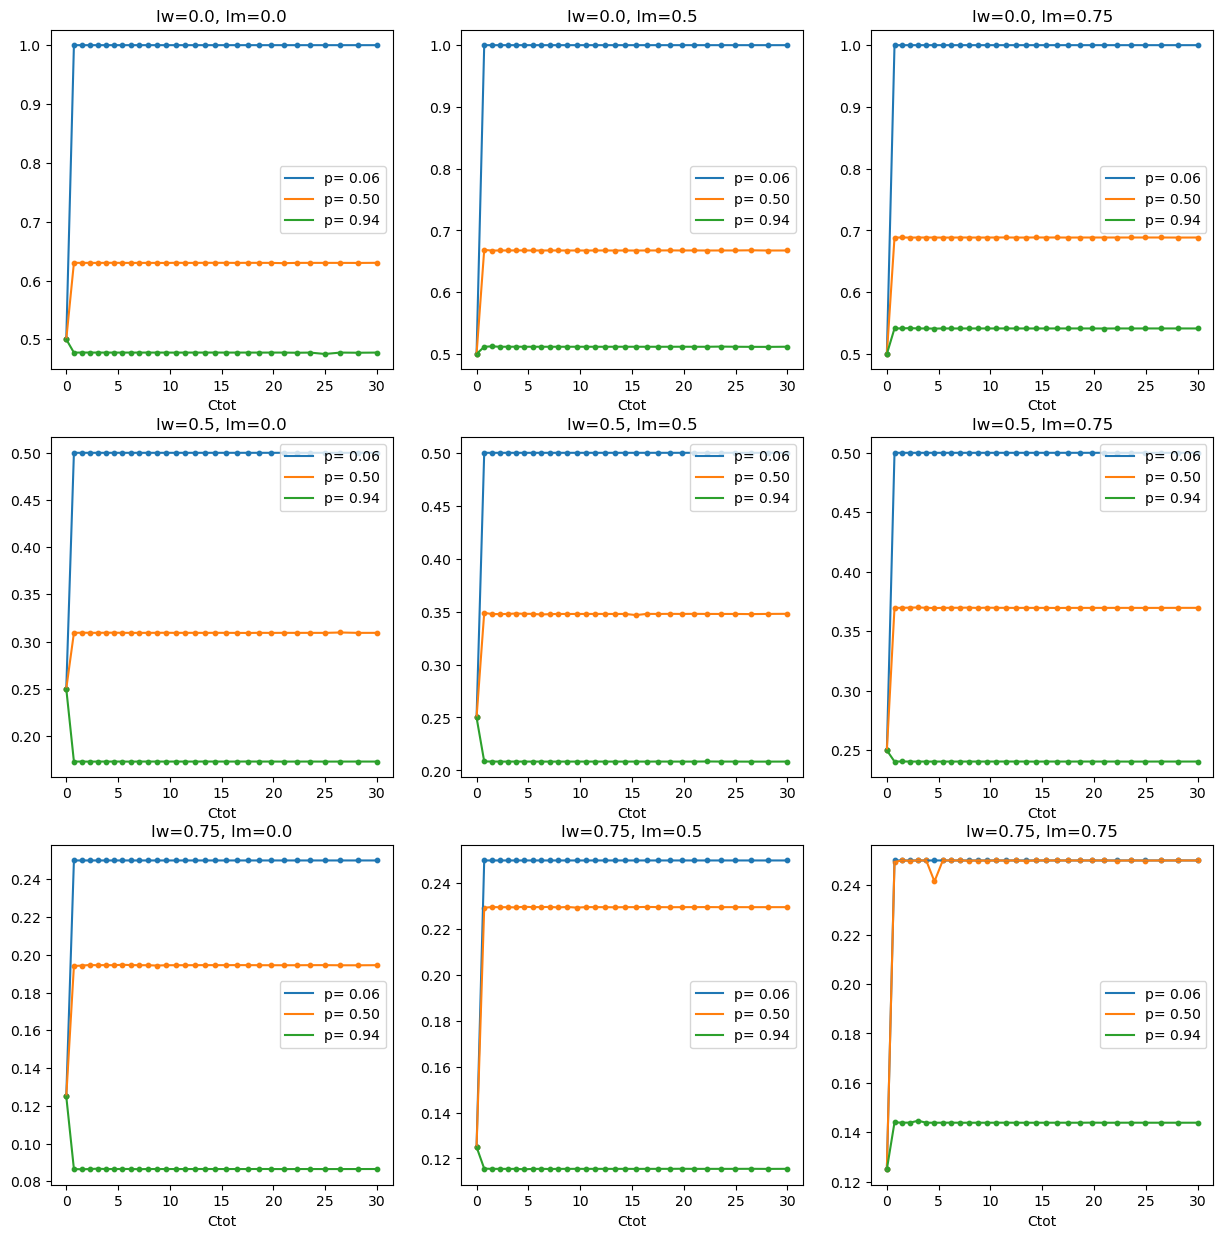

In [8]:
plot_variable('pre_hm_couple', model.sol, iPs, par.grid_Ctot)
plot_variable('pre_hw_couple', model.sol, iPs, par.grid_Ctot)

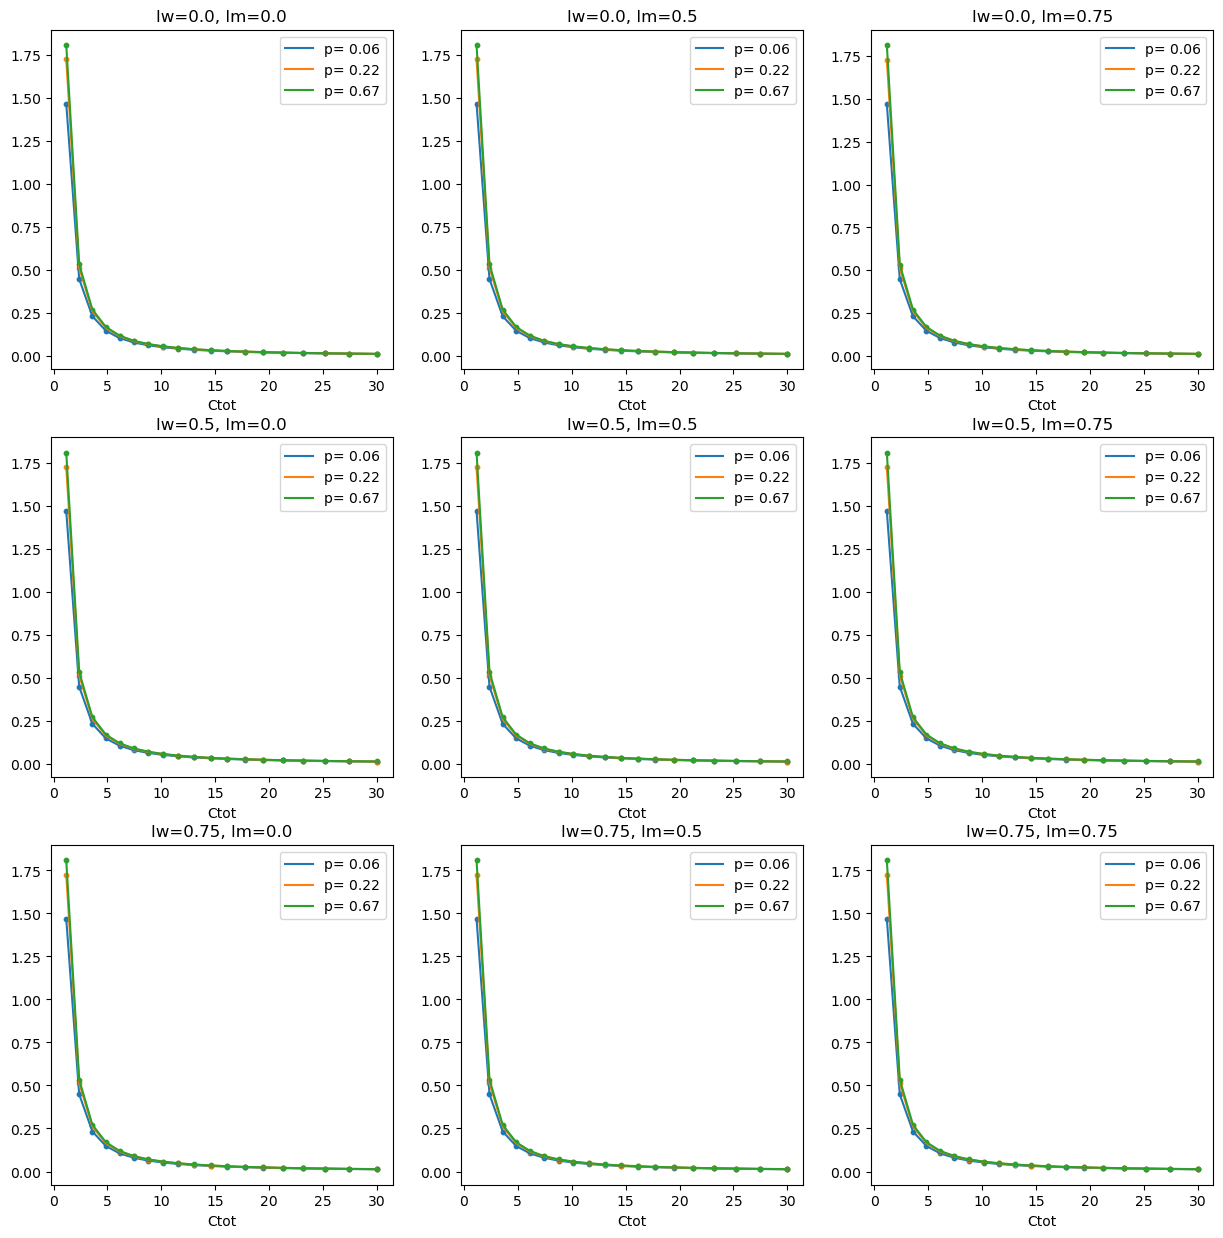

In [9]:
plot_variable('grid_marg_u_couple', model.par, [1, 3, 6], model.par.grid_C_for_marg_u)